[[[246.94165062806206, 195.99771799087463, 293.6647679174076], 0.5], [[220.0], 0.5], [[195.99771799087463], 0.5], [[220.0], 0.5], [[246.94165062806206], 0.5], [[246.94165062806206], 0.5], [[246.94165062806206], 0.5], [[0.0], 0.5]]


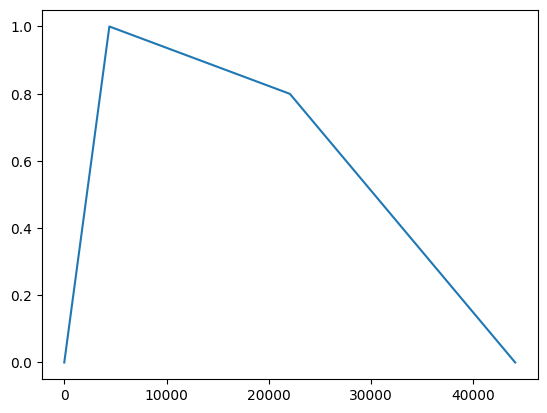

In [28]:
import numpy as np
from IPython.display import Audio
from scipy.io.wavfile import read, write
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

midi_notes = []
for note in range(128):
    midi_notes.append(440*pow(2, (note-69)/12))

def noteToHz (notes, bpm=120) :
    let2num = {'c': 0, 'c#': 1, 'db': 1, 'd': 2, 'd#': 3, 'eb': 3, 'e': 4, 'fb': 4, 'f': 5, 'e#': 5, 'F#': 6, 'gb': 6,
               'g': 7, 'g#': 8, 'ab': 8, 'a': 9, 'a#': 10, 'bb': 10, 'b': 11, 'cb': 11} #all possible note inputs
    whole_note = 240 / bpm
    output = []
    for chord in notes:
        #handling the note to frequency conversion first
        if type(chord[0]) == list: #this means it's a chord
            pitch = []
            for note in range(len(chord[0])):
                octave = int(chord[0][note][0]) * 12 + 12
                letter = let2num[chord[0][note][1:]]
                pitch.append(midi_notes[octave+letter])
        else: #it's a single note
            if chord[0] != 'rest':
                octave = int(chord[0][0]) * 12 + 12
                letter = let2num[chord[0][1:]]
                pitch = [midi_notes[octave+letter]]
            else: #it's a rest
                pitch = [0.0]
        
        #handling the length to second conversion second
        dur = chord[1]*whole_note
        output.append([pitch, dur])
    return output
        

example_notes = [[['3b', '3g', '4d'], 0.25], ['3a', 0.25], ['3g', 0.25], ['3a', 0.25],
                 ['3b', 0.25], ['3b', 0.25], ['3b', 0.25], ['rest', 0.25]]

out = noteToHz(example_notes)
print(out)

def envelope(dur, a=0, d=0, s=1, r=0, fs=44100):
    import numpy as np
    samps = int(fs*dur)
    attack = np.linspace(0, 1, int(fs*a))
    decay = np.linspace(1, s, int(fs*d))
    if dur < a+d:
        env = np.concatenate((attack, decay))
        release = np.linspace(env[samps], 0, int(fs*r))
        env = np.concatenate((env[:samps], release))
    else:
        sussy = np.full(int((dur - a - d) * fs), s)
        release = np.linspace(s, 0, int(fs*r))
        env = np.concatenate([attack, decay, sussy, release])
    return env

def num_del (audio, ms, delays=3, fs=44100):
    import numpy as np
    sec = ms/1000.0
    samps = int(delays * sec * fs)
    pad = np.zeros(samps)
    padded = np.concatenate((audio, pad), axis=0)
    output = np.zeros(padded.size)
    for delay in range(delays+1):
        output = output + np.roll(padded, delay*int(sec*fs))/(1+delay)
    return output

myEnv = envelope(0.5, a=0.1, d=1, s=0.5, r=0.5)
plt.plot(myEnv)